# matplotlab

In [127]:
%matplotlib inline
#导入包
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import pandas as pd
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import trapz 
from scipy.stats import norm
matplotlib.rcParams['axes.unicode_minus']=False#负号不显示解决方案

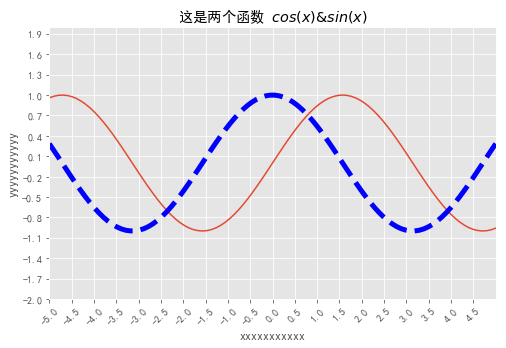

In [115]:
#创建数据
x = np.linspace(-5, 5, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = pd.DataFrame(y2)
#主题设置
plt.style.use('ggplot')
#背景设置

#创建figure窗口
plt.figure(num=3, figsize=(8, 5))
#画曲线1
plt.plot(x, y1)
#画曲线2
plt.plot(x, y2, color='blue', linewidth=5.0, linestyle='--')
#设置坐标轴范围
plt.xlim((-5, 5))
plt.ylim((-2, 2))
#设置标题
plt.title("这是两个函数 $cos(x)&sin(x)$")
#设置坐标轴名称
plt.xlabel('xxxxxxxxxxx')
plt.ylabel('yyyyyyyyyyy')
#设置坐标轴刻度
my_x_ticks = np.arange(-5, 5, 0.5)
my_y_ticks = np.arange(-2, 2, 0.3)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
#x轴文字角度旋转
pl.xticks(rotation=45)

#显示出所有设置
plt.show()

In [109]:
?plt.style.use

# 通过pandas创建图像

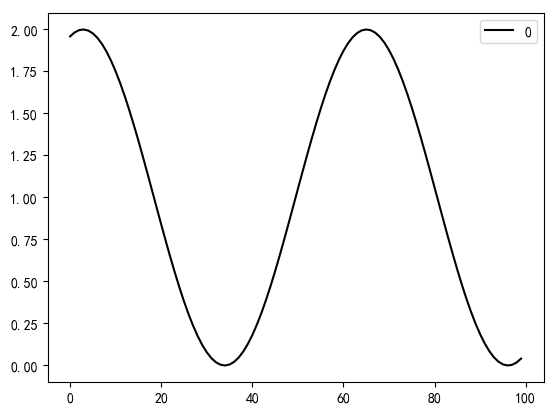

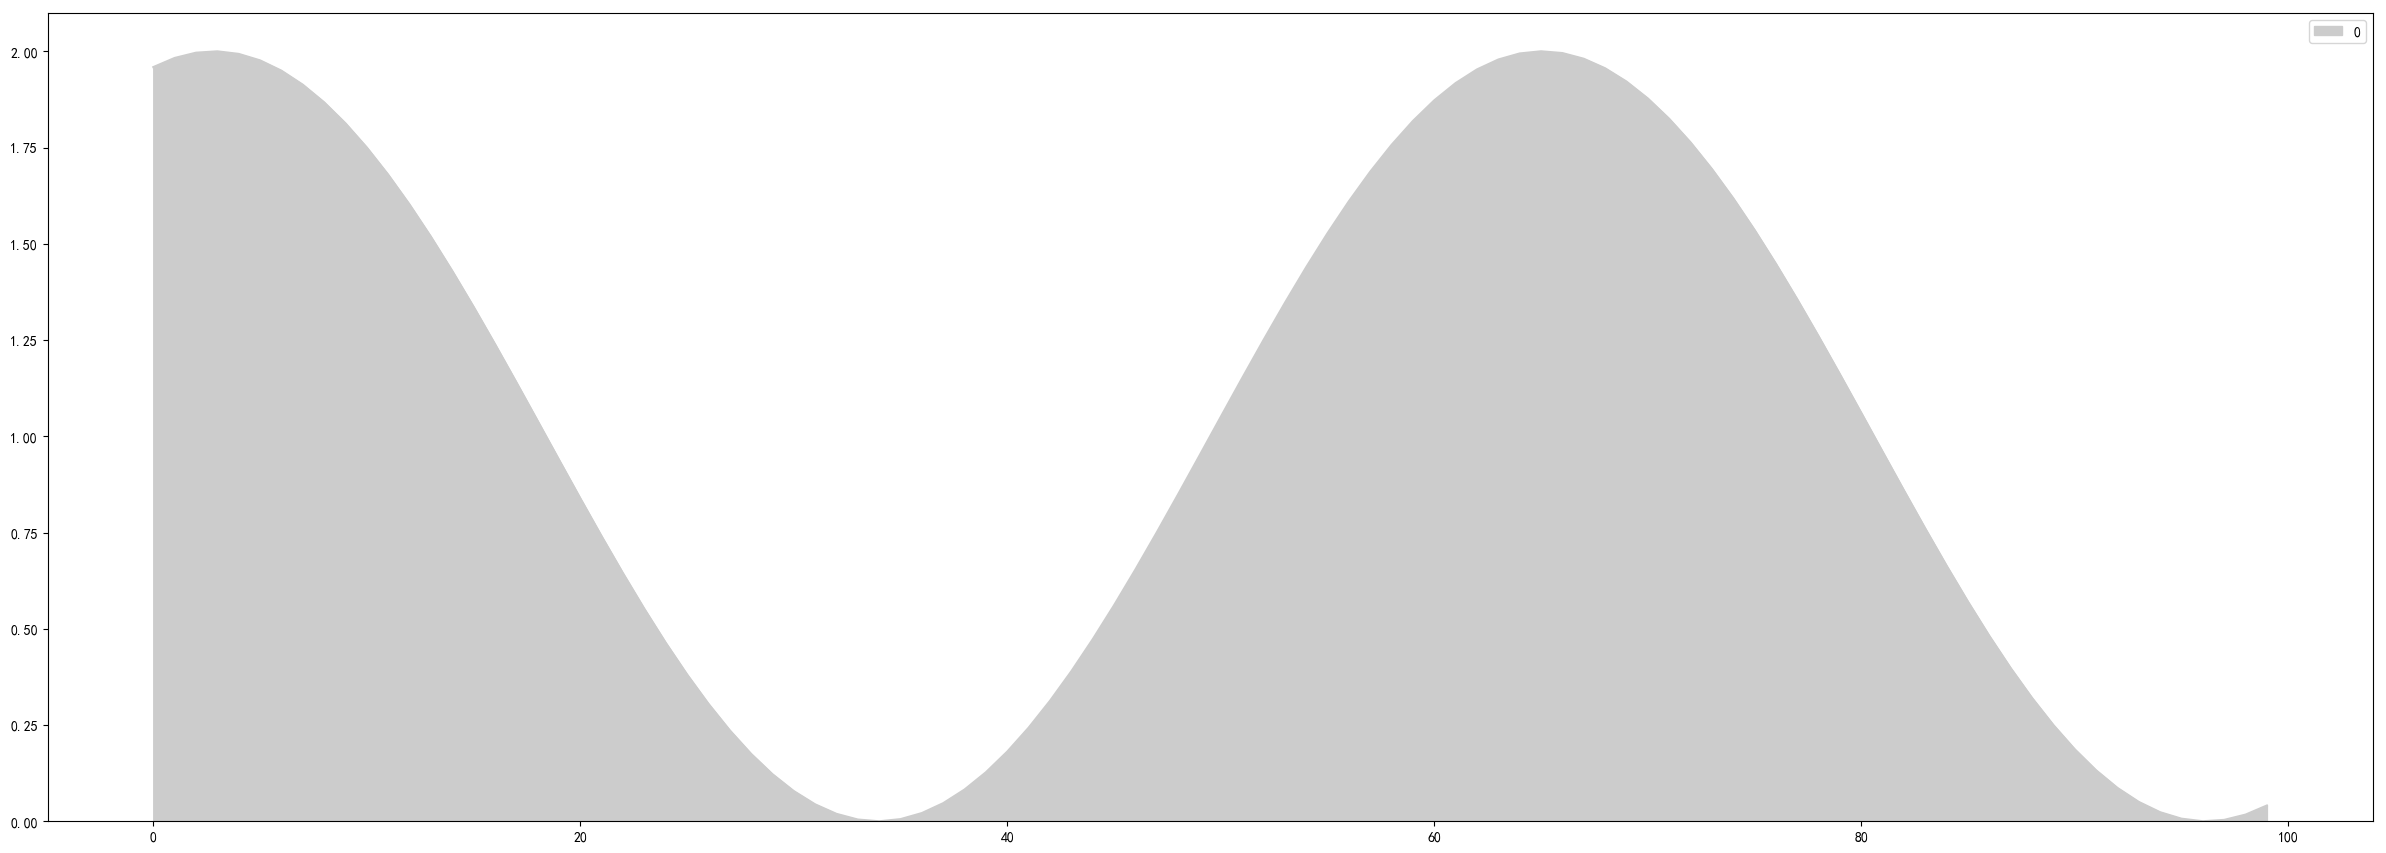

In [148]:
plt.style.use('default')
#用于产生x1,x2之间的N点行线性的矢量
x = np.linspace(-5, 5, 100)
y1 = np.sin(x)+1
y2 = np.cos(x)+1
df1 = pd.DataFrame(y1)
#用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei'] 
#画线
df1.plot(kind='line',color="#000000")
df1.plot(kind='area',color="#CCCCCC")

#得到当前Figure的引用(主要用于保存图片的设置)
fig = plt.gcf()
#设置图像大小
fig.set_size_inches(30,10.5)
#设置图像保存位置，相关pdi等
fig.savefig("text2.png",dpi=100)
plt.figure(figsize=(20,50))



# 子图集

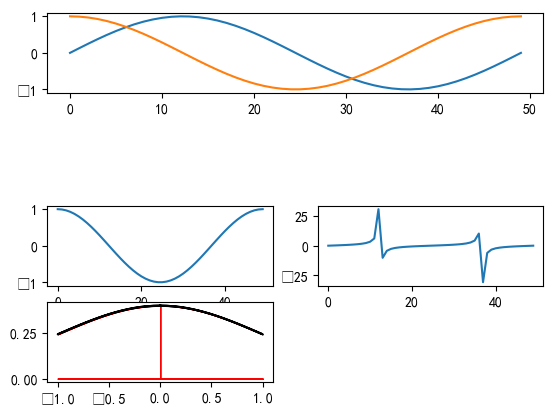

In [141]:

t = np.linspace(0, 2*pi, 50)
x = np.sin(t)
y = np.cos(t)
#2行1列z字排序第1个
subplot(4,1,1)
plot(x)
plot(y)
#3行2列z字排序第5个
subplot(4, 2, 5)
plot(y)
subplot(4, 2,6)
plot(tan(t))
subplot(4, 2,7)
p = trapz(norm.pdf(x), x) 
fill_between(x,norm.pdf(x),color='red')
plot(x,norm.pdf(x),"k-")


# 直方图

(array([  4.,  26.,  74., 187., 255., 233., 140.,  57.,  16.,   8.]),
 array([-3.05604716, -2.42600511, -1.79596307, -1.16592102, -0.53587897,
         0.09416307,  0.72420512,  1.35424717,  1.98428921,  2.61433126,
         3.24437331]),
 <a list of 10 Patch objects>)

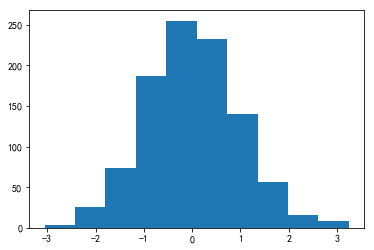

In [129]:
plt.hist(np.random.randn(1000))

## 线性插值

数据导入

In [75]:
data = np.genfromtxt("C:\\Users\\d\\map\\JANAF_CH4.txt", 
                  delimiter="\t", # TAB 分隔
                  skip_header=1,     # 忽略首行
                  names=True,     # 读入属性
                  missing_values="INFINITE",  # 缺失值
                  filling_values=np.inf)      # 填充缺失值

for row in data[:7]:
    print("{}\t{}".format(row['TK'], row['Cp']))
print("...\t...")

0.0	0.0
100.0	33.258
200.0	33.473
250.0	34.216
298.15	35.639
300.0	35.708
350.0	37.874
...	...


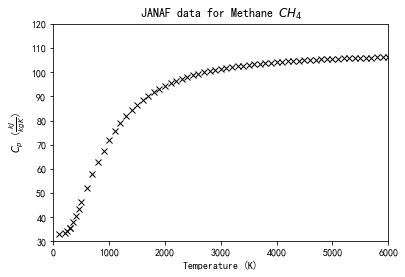

In [76]:
p = plt.plot(data['TK'], data['Cp'], 'kx')
t = plt.title("JANAF data for Methane $CH_4$")
a = plt.axis([0, 6000, 30, 120])
x = plt.xlabel("Temperature (K)")
y = plt.ylabel(r"$C_p$ ($\frac{kJ}{kg K}$)")

In [78]:
from scipy.interpolate import interp1d

默认为线性差值
nearest 最近邻插值
zero 0阶插值
linear 线性插值
quadratic 二次插值
cubic 三次插值
4,5,6,7 更高阶插值

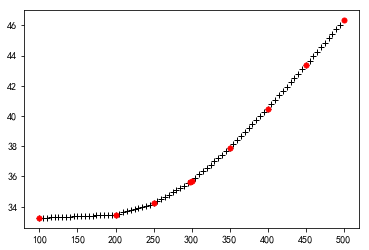

In [101]:
T = np.arange(100,500,5)
#横坐标，纵坐标，插值阶数
ch4_cp = interp1d(data['TK'], data['Cp'],kind=1) 
plt.plot(T, ch4_cp(T), "+k")
p = plt.plot(data['TK'][1:10], data['Cp'][1:10], 'ro', markersize=5)

# 径向函数插值

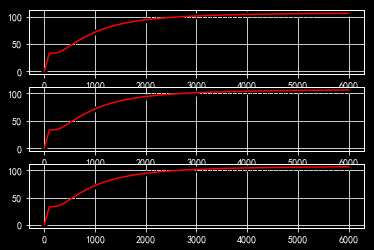

In [102]:
from scipy.interpolate.rbf import Rbf
plt.style.use('ggplot')
with plt.style.context(('dark_background')):
    subplot(3, 1, 1)
    cp_rbf = Rbf(data['TK'], data['Cp'], function = "multiquadric")
    plt.plot(data['TK'], data['Cp'], 'k+')
    p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')
    subplot(3, 1, 2)
    cp_rbf = Rbf(data['TK'], data['Cp'], function = "gaussian")
    plt.plot(data['TK'], data['Cp'], 'k+')
    p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')
    subplot(3, 1, 3)
    cp_rbf = Rbf(data['TK'], data['Cp'], function = "inverse_multiquadric")
    plt.plot(data['TK'], data['Cp'], 'k+')
    p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')